In [1]:
# Remember you need to use SWAN with NXCALS support....
import datetime
import pytimber
ldb = pytimber.LoggingDB(source="nxcals")

kinit: type the password for `dgamba`:········


In [2]:
# Just some simple imports
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['lines.linewidth'] = 2


### LOOKING at e-cooler

In [35]:
# Last Friday before end of run
t1 = '2021-11-12 00:00:00.000'
t2 = '2021-11-12 12:00:00.000'

listOfSignals = ['DR3.VGI2906:PR', 'DR.ECVCOLLECTOR.ACQUISITION:ACQ2', 'DR.ECVCATHODE.ACQUISITION:ACQ2', 'DR.ECVCATHODE.ACQUISITION:ACQ1']
#listOfSignals = ['DR3.VGI2906:PR']

extractedData = ldb.get(listOfSignals, t1, t2)

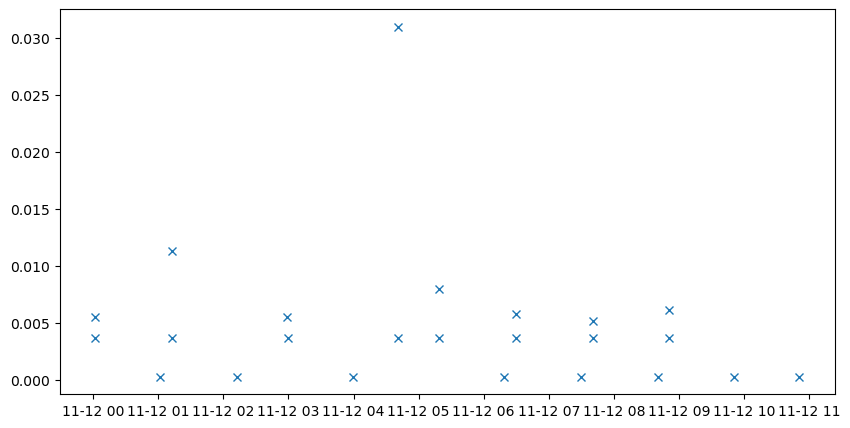

In [37]:
#### # plot everything, but give stability on filtered shots
myFig = plt.figure()
for i, variable in enumerate([listOfSignals[-1]]):
    _times = np.array([datetime.datetime.fromtimestamp(_time) for _time in extractedData[variable][0]])
    if myFig.get_axes() == []:
        ax = plt.gca()
    else:
        ax = plt.gca()
        ax = ax.twinx()
    ax.plot(_times, extractedData[variable][1], 'x', label = variable.split(sep=':')[0])

#plt.ylim([3268.1445, 3268.1446])

### Main intensities for ELENA

In [43]:
listOfIntensities_ELENA = [ 'LNR.APULB.0027:INTENSITY', 'LNE.APULB.0030:INTENSITY','LNE.APULB.5030:INTENSITY']
listOfIntensities_scaling_to1e6_ELENA = [1, 4, 4]
extractedData_ELENA = ldb.get(listOfIntensities_ELENA, t1, t2)

Good shots (LNE.APULB.0030:INTENSITY > 4.00) = 29.105263157894736%
LNR.APULB.0027:INTENSITY stability: 97.49 % (mean = 35.72)
LNE.APULB.0030:INTENSITY stability: 7.88 % (mean = 7.25)
LNE.APULB.5030:INTENSITY stability: 178.64 % (mean = 1.52)


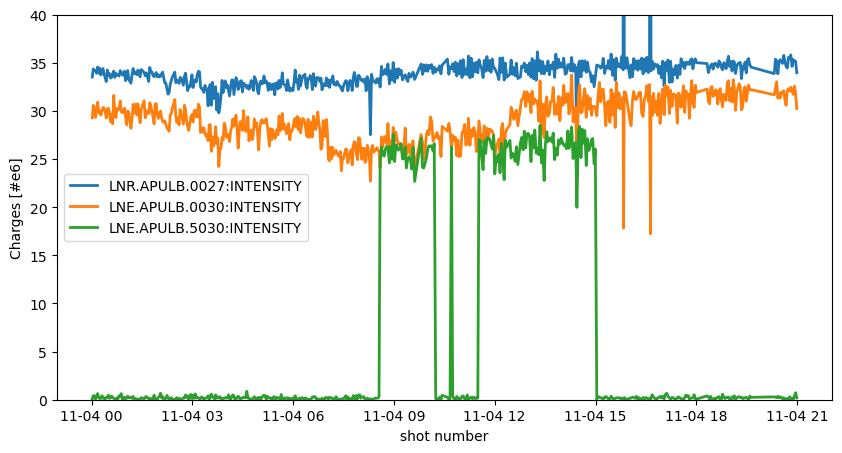

In [47]:
# Filter on some variable and get only interesting shots
filterVariable = 'LNE.APULB.0030:INTENSITY'
_filterValue = 4

filter_ELENA = extractedData_ELENA[filterVariable][1] > _filterValue
print("Good shots ({} > {:.2f}) = {}%".format(filterVariable, _filterValue, 100*np.sum(filter_ELENA)/len(filter_ELENA)))

# plot everything, but give stability on filtered shots
plt.figure()
for i, variable in enumerate(listOfIntensities_ELENA):
    _times = np.array([datetime.datetime.fromtimestamp(_time) for _time in extractedData_ELENA[variable][0]])
    plt.plot(_times[filter_ELENA], extractedData_ELENA[variable][1][filter_ELENA]*listOfIntensities_scaling_to1e6_ELENA[i],     label = variable)
    print("{} stability: {:.2f} % (mean = {:.2f})".format(variable, 100*np.std(extractedData_ELENA[variable][1][filter_ELENA])/np.mean(extractedData_ELENA[variable][1][filter_ELENA]), np.mean(extractedData_ELENA[variable][1][filter_ELENA])))

plt.ylim([0, 40])
plt.xlabel("shot number")
plt.ylabel("Charges [#e6]")
plt.legend()

### Now looking at AD with BCCCA

In [11]:
# Similar, get data already "condensated" int he FESA class of BCCCA acquisition:
BCCCADATA = ldb.get(['ADE.BCCCA:Acquisition:numOfChargesPerFlatTop'], t1, t2)
# extract data (forget about times)
BCCCADATA_values = np.array(BCCCADATA['ADE.BCCCA:Acquisition:numOfChargesPerFlatTop'][1])

In [12]:
# Extract values in independet variables to ease the plotting afterwards
ADinjected     = BCCCADATA_values[:,0,0]
AD_3_5_GeV_end = BCCCADATA_values[:,0,1]
AD_2_0_GeV_end = BCCCADATA_values[:,1,1]
AD_0_3_GeV_end = BCCCADATA_values[:,2,1]
AD_0_1_GeV_end = BCCCADATA_values[:,3,1]

# compute efficiency
efficiency_percent = 100*np.divide(AD_0_1_GeV_end, AD_3_5_GeV_end)
aux = AD_3_5_GeV_end > 5e6
efficiency_percent[~aux] = np.nan

Text(0, 0.5, '3.5->0.1 efficency [%]')

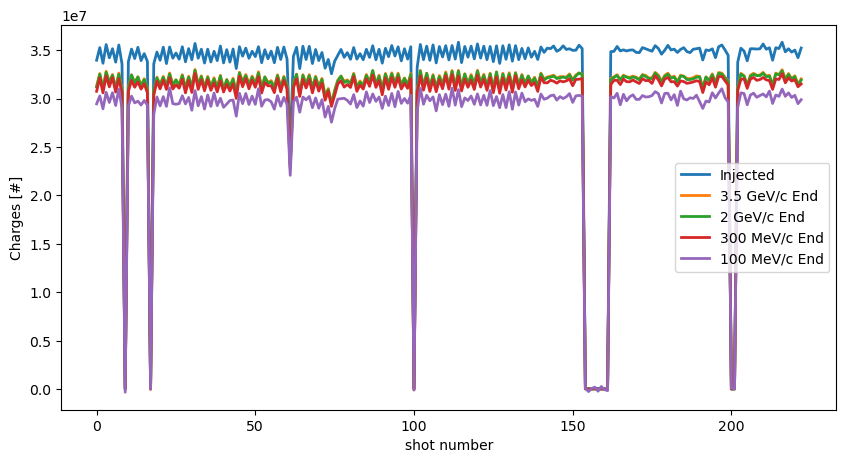

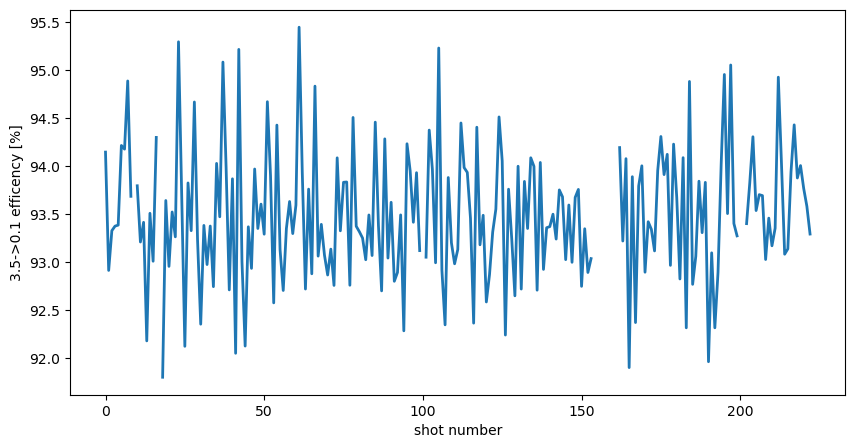

In [13]:
# plot everything
plt.figure()
plt.plot(ADinjected,     label = 'Injected')
plt.plot(AD_3_5_GeV_end, label = '3.5 GeV/c End')
plt.plot(AD_2_0_GeV_end, label = '2 GeV/c End')
plt.plot(AD_0_3_GeV_end, label = '300 MeV/c End')
plt.plot(AD_0_1_GeV_end, label = '100 MeV/c End')
plt.xlabel("shot number")
plt.ylabel("Charges [#]")
plt.legend()

plt.figure()
plt.plot(efficiency_percent, label = '100 MeV/c / 3.5 GeV/c')
plt.xlabel("shot number")
plt.ylabel("3.5->0.1 efficency [%]")

In [11]:
# make some stats
minInjected_AD_e7 = 3.0
filter_AD = ADinjected > minInjected_AD_e7*1e7

print("Good shots AD ({} > {:.2f}e7) = {:.2f}%".format(filterVariable, minInjected_AD_e7, 100*np.sum(filter_AD)/len(filter_AD)))

print("3.5 GeV/c end stability: {:.2f}% (mean = {:.2f}e6)".format(100*np.std(AD_3_5_GeV_end[filter_AD])/np.mean(AD_3_5_GeV_end[filter_AD]), np.mean(AD_3_5_GeV_end[filter_AD])))
print("2.0 GeV/c end stability: {:.2f}% (mean = {:.2f}e6)".format(100*np.std(AD_2_0_GeV_end[filter_AD])/np.mean(AD_2_0_GeV_end[filter_AD]), np.mean(AD_2_0_GeV_end[filter_AD])))
print("300 MeV/c end stability: {:.2f}% (mean = {:.2f}e6)".format(100*np.std(AD_0_3_GeV_end[filter_AD])/np.mean(AD_0_3_GeV_end[filter_AD]), np.mean(AD_0_3_GeV_end[filter_AD])))
print("100 MeV/c end stability: {:.2f}% (mean = {:.2f}e6)".format(100*np.std(AD_0_1_GeV_end[filter_AD])/np.mean(AD_0_1_GeV_end[filter_AD]), np.mean(AD_0_1_GeV_end[filter_AD])))

print("3.5->100 MeV/c efficiency: mean = {:.2f}% \pm {:.2f}%".format(np.mean(efficiency_percent[filter_AD]), np.std(efficiency_percent[filter_AD])))



Good shots AD (DR.RF.NB-PART.3_5G:INTENSITY > 3.00e7) = 97.16%
3.5 GeV/c end stability: 1.83% (mean = 32113564.09e6)
2.0 GeV/c end stability: 22.66% (mean = 30430844.47e6)
300 MeV/c end stability: 22.82% (mean = 29929467.26e6)
100 MeV/c end stability: 22.87% (mean = 28418142.28e6)
3.5->100 MeV/c efficiency: mean = 88.50% \pm 20.22%


### Some data, but from XSampler

In [25]:
BCCCADATA_XS = ldb.get(['DR.BCCCA_CHARGE-SD:Samples:hotSpotsSamples'], t1, t2)
# need some work here to get rid of useless index
BCCCADATA_XS_values = np.array(BCCCADATA_XS['DR.BCCCA_CHARGE-SD:Samples:hotSpotsSamples'][1])[:, 0, :]

<ipython-input-54-efc19420c177>:12: RuntimeWarning: divide by zero encountered in true_divide
  fromInjToEndSC = 100*np.divide(BCCCADATA_XS_values[:, 3], BCCCADATA_XS_values[:, 0])


(90.0, 101.0)

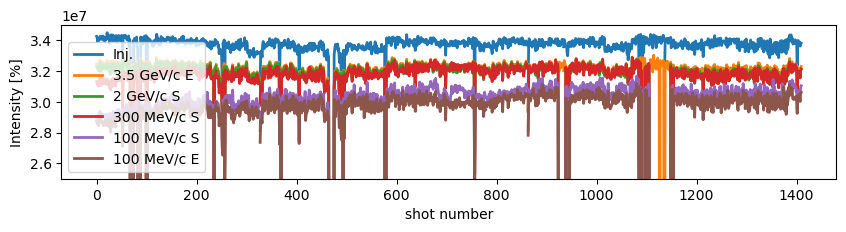

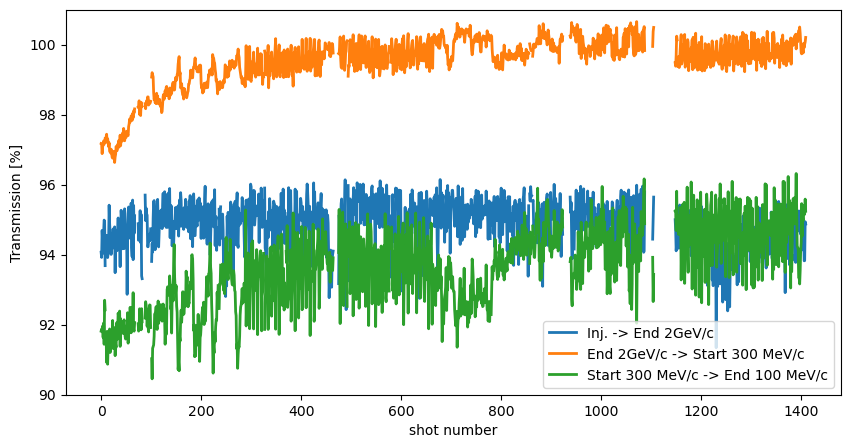

In [54]:
# One might be interested only to a few values:
plt.figure(figsize=(10,2))
plt.plot(BCCCADATA_XS_values[:, (0,1,2,4,6,7)])
plt.xlabel("shot number")
plt.ylabel("Intensity [%]")
plt.legend(['Inj.', '3.5 GeV/c E', '2 GeV/c S', '300 MeV/c S', '100 MeV/c S', '100 MeV/c E'], )
plt.ylim([2.5e7, 3.5e7])



# Or some transmission at interesting transictions:
fromInjToEndSC = 100*np.divide(BCCCADATA_XS_values[:, 3], BCCCADATA_XS_values[:, 0])
fromSCtoEC     = 100*np.divide(BCCCADATA_XS_values[:, 4], BCCCADATA_XS_values[:, 3])
fromECtoEjc    = 100*np.divide(BCCCADATA_XS_values[:, 7], BCCCADATA_XS_values[:, 4])
# filter bad values
auxNotGoodIndex = BCCCADATA_XS_values[:, 7] < 2e7
fromInjToEndSC[auxNotGoodIndex] = np.nan
fromSCtoEC[auxNotGoodIndex] = np.nan
fromECtoEjc[auxNotGoodIndex] = np.nan

plt.figure()
plt.plot(fromInjToEndSC, label='Inj. -> End 2GeV/c')
plt.plot(fromSCtoEC, label='End 2GeV/c -> Start 300 MeV/c')
plt.plot(fromECtoEjc, label='Start 300 MeV/c -> End 100 MeV/c')
plt.xlabel("shot number")
plt.ylabel("Transmission [%]")
plt.legend()
plt.ylim([90, 101])








## ELENA
### more difficult, raw data from LLRF TPU Intensity...

In [48]:
TPUDATA = ldb.get(['LNA.TPU_INTSY-ACQ:Data:samples'], t1, t2)
TPUDATA_values = TPUDATA['LNA.TPU_INTSY-ACQ:Data:samples'][1]
TPUDATA_times = np.array([datetime.datetime.fromtimestamp(_time) for _time in TPUDATA['LNA.TPU_INTSY-ACQ:Data:samples'][0]])



(0.0, 40000000.0)

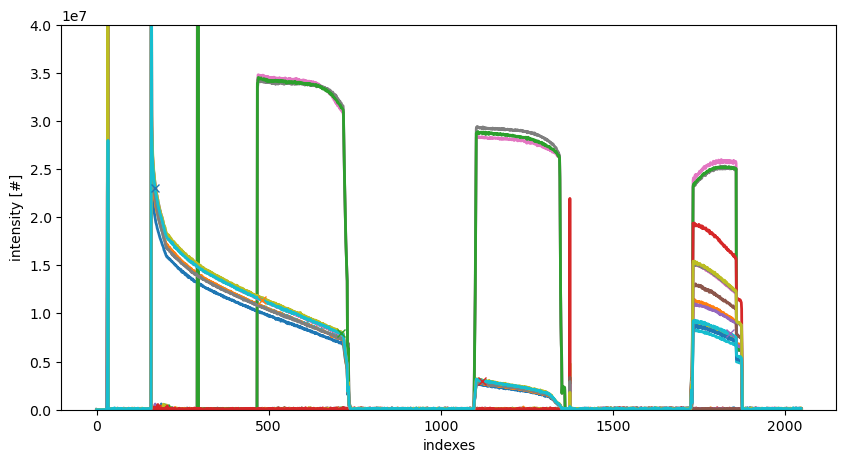

In [61]:
# Identify the index of injection and extraciton, assuming they don't move...
indexHminusInj = 170
indexInjection = 480
indexMidplateuStart = 709
indexMidplateuEnd   = 1120
indexEjection = 1840


plt.figure()
for shotToPlot in np.arange(305,325,1):
    plt.plot(TPUDATA_values[shotToPlot,:])
plt.plot(indexHminusInj,      TPUDATA_values[shotToPlot,indexHminusInj],'x')
plt.plot(indexInjection,      TPUDATA_values[shotToPlot,indexInjection],'x')
plt.plot(indexMidplateuStart, TPUDATA_values[shotToPlot,indexMidplateuStart],'x')
plt.plot(indexMidplateuEnd,   TPUDATA_values[shotToPlot,indexMidplateuEnd],'x')
plt.plot(indexEjection,       TPUDATA_values[shotToPlot,indexEjection], 'x')
plt.xlabel("indexes")
plt.ylabel("intensity [#]")
plt.ylim([0, 4e7])

<ipython-input-63-b9d1ed21aff7>:7: RuntimeWarning: divide by zero encountered in true_divide
  ELENA_efficiency_percent = 100*np.divide(ELENA_ejected_values, ELENA_injected_values)


Text(0, 0.5, '100 -> 13.7 efficency [%]')

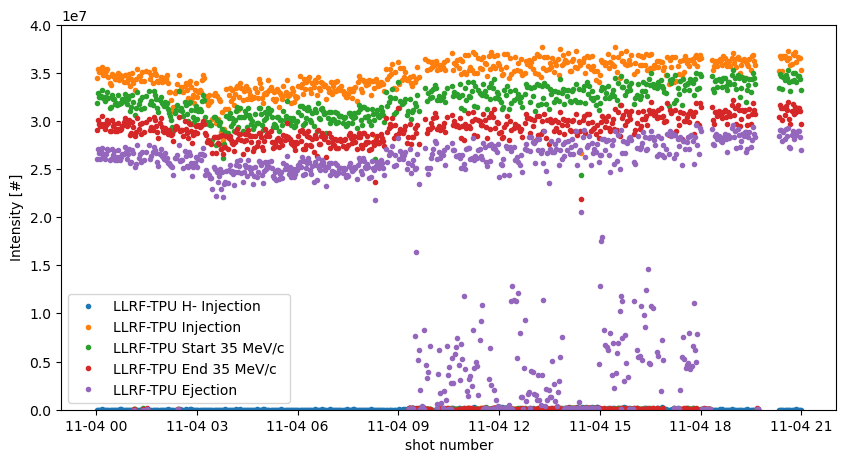

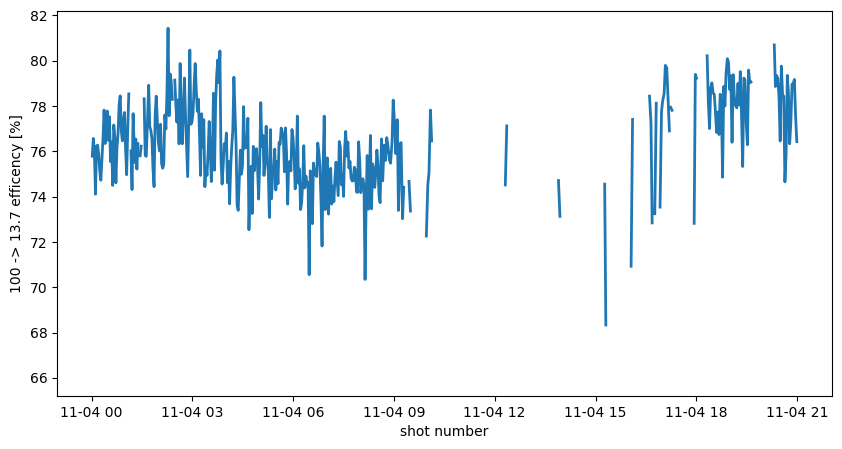

In [63]:
ELENA_hmin_injected_values = TPUDATA_values[:,indexHminusInj]
ELENA_injected_values = TPUDATA_values[:,indexInjection]
ELENA_35Start_values  = TPUDATA_values[:,indexMidplateuStart]
ELENA_35End_values    = TPUDATA_values[:,indexMidplateuEnd]
ELENA_ejected_values  = TPUDATA_values[:,indexEjection]

ELENA_efficiency_percent = 100*np.divide(ELENA_ejected_values, ELENA_injected_values)
aux = ELENA_injected_values > 5e6
ELENA_efficiency_percent[~aux] = np.nan

# we care only about pbar cycles, so filter out 
_pbar_cycles = ELENA_hmin_injected_values < 3e5

plt.figure()
plt.plot(TPUDATA_times[_pbar_cycles], ELENA_hmin_injected_values[_pbar_cycles], '.', label = 'LLRF-TPU H- Injection')
plt.plot(TPUDATA_times[_pbar_cycles], ELENA_injected_values[_pbar_cycles], '.', label = 'LLRF-TPU Injection')
plt.plot(TPUDATA_times[_pbar_cycles], ELENA_35Start_values[_pbar_cycles], '.', label = 'LLRF-TPU Start 35 MeV/c')
plt.plot(TPUDATA_times[_pbar_cycles], ELENA_35End_values[_pbar_cycles], '.', label = 'LLRF-TPU End 35 MeV/c')
plt.plot(TPUDATA_times[_pbar_cycles], ELENA_ejected_values[_pbar_cycles], '.', label = 'LLRF-TPU Ejection')
plt.ylim([0, 4e7])

plt.xlabel("shot number")
plt.ylabel("Intensity [#]")
plt.legend()

plt.figure()
plt.plot(TPUDATA_times[_pbar_cycles], ELENA_efficiency_percent[_pbar_cycles], label = '13.7 [MeV/c] / 100 [MeV/c]')
plt.xlabel("shot number")
plt.ylabel("100 -> 13.7 efficency [%]")


In [64]:
# make some stats
minInjected_ELENA_e7 = 2.5
filter_ELENA = (ELENA_injected_values > minInjected_ELENA_e7*1e7) & _pbar_cycles

print("Good shots ELENA (LLRF TPU Injection > {:.2f}e7) = {:.2f}%".format(minInjected_ELENA_e7, 100*np.sum(filter_ELENA)/len(filter_ELENA)))

print("100 MeV/c start stability: {:.2f}% (mean = {:.2f}e6)".format(100*np.std(ELENA_injected_values[filter_ELENA])/np.mean(ELENA_injected_values[filter_ELENA]), np.mean(ELENA_injected_values[filter_ELENA])))
print(" 35 MeV/c start stability: {:.2f}% (mean = {:.2f}e6)".format(100*np.std(ELENA_35Start_values[filter_ELENA])/np.mean(ELENA_35Start_values[filter_ELENA]), np.mean(ELENA_35Start_values[filter_ELENA])))
print(" 35 MeV/c   end stability: {:.2f}% (mean = {:.2f}e6)".format(100*np.std(ELENA_35End_values[filter_ELENA])/np.mean(ELENA_35End_values[filter_ELENA]), np.mean(ELENA_35End_values[filter_ELENA])))
print(" 13.7 MeV/c end stability: {:.2f}% (mean = {:.2f}e6)".format(100*np.std(ELENA_ejected_values[filter_ELENA])/np.mean(ELENA_ejected_values[filter_ELENA]), np.mean(ELENA_ejected_values[filter_ELENA])))

print("100->13.7 MeV/c efficiency: mean = {:.2f} \pm {:.2f}".format(np.mean(ELENA_efficiency_percent[filter_ELENA]), np.std(ELENA_efficiency_percent[filter_ELENA])))


Good shots ELENA (LLRF TPU Injection > 2.50e7) = 27.43%
100 MeV/c start stability: 4.70% (mean = 34673923.94e6)
 35 MeV/c start stability: 5.15% (mean = 31972017.60e6)
 35 MeV/c   end stability: 4.33% (mean = 29211123.16e6)
 13.7 MeV/c end stability: 5.57% (mean = 26316217.80e6)
100->13.7 MeV/c efficiency: mean = 75.90 \pm 2.30


### And now the SEMs at Injection

In [17]:
SEMList_intensity = ['LNI.BSGW.0030:FitAcq:gaussAmplitude','LNI.BSGW.0060:FitAcq:gaussAmplitude']
SEMList_position = ['LNI.BSGW.0030:FitAcq:gaussMean','LNI.BSGW.0060:FitAcq:gaussMean']
SEMList_sigmas = ['LNI.BSGW.0030:FitAcq:gaussSigma','LNI.BSGW.0060:FitAcq:gaussSigma']

SEM_intensity = ldb.get(SEMList_intensity, t1, t2)
SEM_position  = ldb.get(SEMList_position, t1, t2)
SEM_sigmas  = ldb.get(SEMList_sigmas, t1, t2)

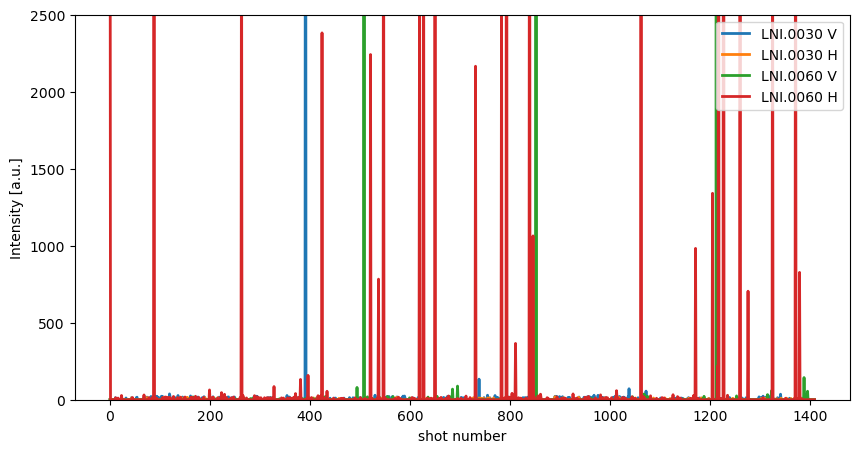

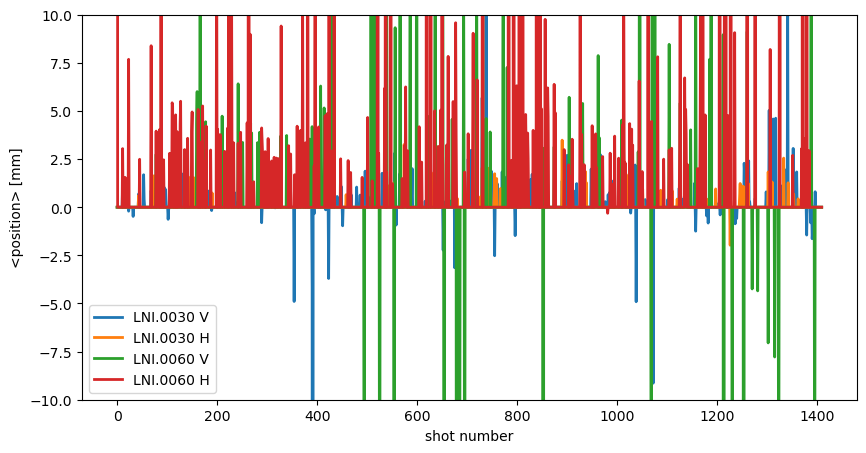

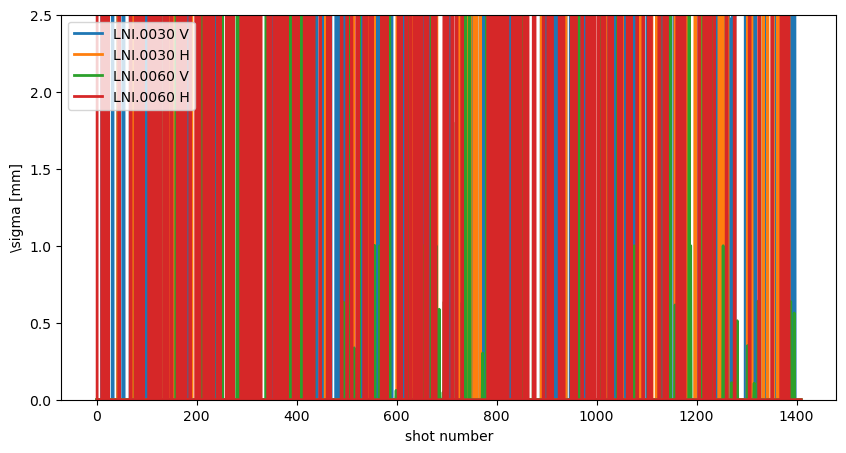

In [18]:
# Intensity
plt.figure()
plt.plot(SEM_intensity['LNI.BSGW.0030:FitAcq:gaussAmplitude'][1][:,0], label='LNI.0030 V')
plt.plot(SEM_intensity['LNI.BSGW.0030:FitAcq:gaussAmplitude'][1][:,1], label='LNI.0030 H')
plt.plot(SEM_intensity['LNI.BSGW.0060:FitAcq:gaussAmplitude'][1][:,0], label='LNI.0060 V')
plt.plot(SEM_intensity['LNI.BSGW.0060:FitAcq:gaussAmplitude'][1][:,1], label='LNI.0060 H')
plt.xlabel("shot number")
plt.ylabel("Intensity [a.u.]")
plt.ylim([0, 2.5e3])
plt.legend()

# Position
plt.figure()
plt.plot(SEM_position['LNI.BSGW.0030:FitAcq:gaussMean'][1][:,0], label='LNI.0030 V')
plt.plot(SEM_position['LNI.BSGW.0030:FitAcq:gaussMean'][1][:,1], label='LNI.0030 H')
plt.plot(SEM_position['LNI.BSGW.0060:FitAcq:gaussMean'][1][:,0], label='LNI.0060 V')
plt.plot(SEM_position['LNI.BSGW.0060:FitAcq:gaussMean'][1][:,1], label='LNI.0060 H')
plt.xlabel("shot number")
plt.ylabel("<position> [mm]")
plt.ylim([-10, 10])
plt.legend()

# Sigma
plt.figure()
plt.plot(SEM_sigmas['LNI.BSGW.0030:FitAcq:gaussSigma'][1][:,0], label='LNI.0030 V')
plt.plot(SEM_sigmas['LNI.BSGW.0030:FitAcq:gaussSigma'][1][:,1], label='LNI.0030 H')
plt.plot(SEM_sigmas['LNI.BSGW.0060:FitAcq:gaussSigma'][1][:,0], label='LNI.0060 V')
plt.plot(SEM_sigmas['LNI.BSGW.0060:FitAcq:gaussSigma'][1][:,1], label='LNI.0060 H')
plt.xlabel("shot number")
plt.ylabel("\sigma [mm]")
plt.ylim([0, 2.5])
plt.legend()


In [38]:
minSEMIntensity = 1000
maxSEMIntensity = 3000

aux = SEM_intensity['LNI.BSGW.0030:FitAcq:gaussAmplitude'][1][:,0]
SEM_filter = (aux > minSEMIntensity) & (aux < maxSEMIntensity)

# make some stats
print("Good shots LNI (SEM 0030 V > 1000 & < 3000) = {:.2f}%".format(100*np.sum(SEM_filter)/len(SEM_filter)))

for key in SEM_intensity.keys():
    text = key.split(':')[0]
    print("Intensity stability {} V: {:.2f}% (mean = {:.2f}au)".format(text, 100*np.std(SEM_intensity[key][1][SEM_filter,0])/np.mean(SEM_intensity[key][1][SEM_filter,0]), np.mean(SEM_intensity[key][1][SEM_filter,0])))
    print("Intensity stability {} H: {:.2f}% (mean = {:.2f}au)".format(text, 100*np.std(SEM_intensity[key][1][SEM_filter,1])/np.mean(SEM_intensity[key][1][SEM_filter,1]), np.mean(SEM_intensity[key][1][SEM_filter,1])))
    
for key in SEM_position.keys():
    text = key.split(':')[0]
    print("Orbit stability {} V: {:.2f}mm rms; mean = {:.2f}mm)".format(text, np.std(SEM_position[key][1][SEM_filter,0]), np.mean(SEM_position[key][1][SEM_filter,0])))
    print("Orbit stability {} H: {:.2f}mm rms; mean = {:.2f}mm)".format(text, np.std(SEM_position[key][1][SEM_filter,1]), np.mean(SEM_position[key][1][SEM_filter,1])))



Good shots LNI (SEM 0030 V > 1000 & < 3000) = 90.00%
Intensity stability LNI.BSGW.0030 V: 3.74% (mean = 1683.46au)
Intensity stability LNI.BSGW.0030 H: 1639.72% (mean = 6448916.06au)
Intensity stability LNI.BSGW.0060 V: 3.86% (mean = 2051.68au)
Intensity stability LNI.BSGW.0060 H: 3.76% (mean = 1233.20au)
Orbit stability LNI.BSGW.0030 V: 0.71mm rms; mean = 4.13mm)
Orbit stability LNI.BSGW.0030 H: 2444.26mm rms; mean = -152.06mm)
Orbit stability LNI.BSGW.0060 V: 0.56mm rms; mean = 2.97mm)
Orbit stability LNI.BSGW.0060 H: 1.05mm rms; mean = -1.00mm)


#### Look for some correlation

In [67]:
extractedData_ELENA

{'LNE.APULB.0030:INTENSITY': (array([1.63598047e+09, 1.63598059e+09, 1.63598070e+09, ...,
         1.63605571e+09, 1.63605583e+09, 1.63605597e+09]),
  array([7.3217001 , 7.64559984, 7.52670002, ..., 8.14509964, 7.96829987,
         7.56099987])),
 'LNE.APULB.5030:INTENSITY': (array([1.63598047e+09, 1.63598059e+09, 1.63598070e+09, ...,
         1.63605571e+09, 1.63605583e+09, 1.63605597e+09]),
  array([0.0214, 0.1056, 0.1   , ..., 0.0969, 0.1821, 0.048 ])),
 'LNR.APULB.0027:INTENSITY': (array([1.63598047e+09, 1.63598059e+09, 1.63598070e+09, ...,
         1.63605571e+09, 1.63605583e+09, 1.63605597e+09]),
  array([33.5237999 , 34.38169861, 34.21720123, ..., 35.12020111,
         35.17829895, 33.96569824]))}

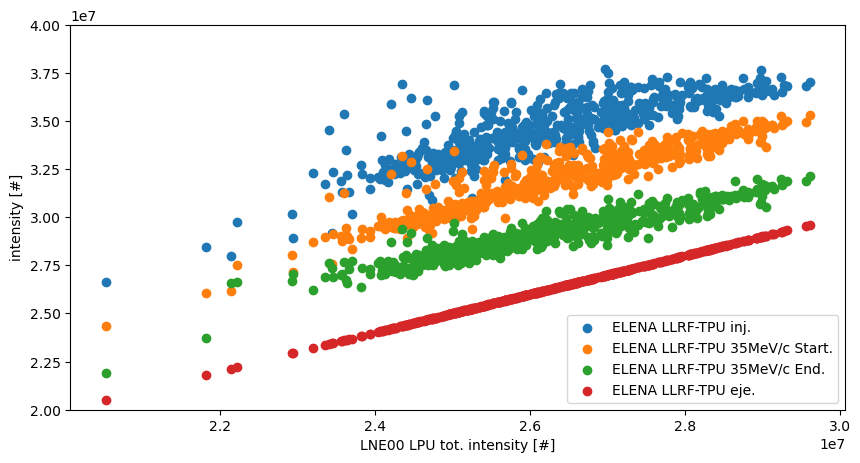

In [74]:
# intensities as a function of ejected intensity
#xvalue     = 4*1e6*extractedData_ELENA['LNE.APULB.0030:INTENSITY'][1][filter_ELENA]
xvalue     = ELENA_ejected_values[filter_ELENA]

corrValue1 = ELENA_injected_values[filter_ELENA]
corrValue2 = ELENA_35Start_values[filter_ELENA]
corrValue3 = ELENA_35End_values[filter_ELENA]
corrValue4 = ELENA_ejected_values[filter_ELENA]

plt.figure()
plt.scatter(xvalue, corrValue1, label='ELENA LLRF-TPU inj.')
plt.scatter(xvalue, corrValue2, label='ELENA LLRF-TPU 35MeV/c Start.')
plt.scatter(xvalue, corrValue3, label='ELENA LLRF-TPU 35MeV/c End.')
plt.scatter(xvalue, corrValue4, label='ELENA LLRF-TPU eje.')
plt.ylabel('intensity [#]')
plt.xlabel('LNE00 LPU tot. intensity [#]')
#plt.axis('equal')
plt.ylim([2e7,4.e7])
plt.legend()

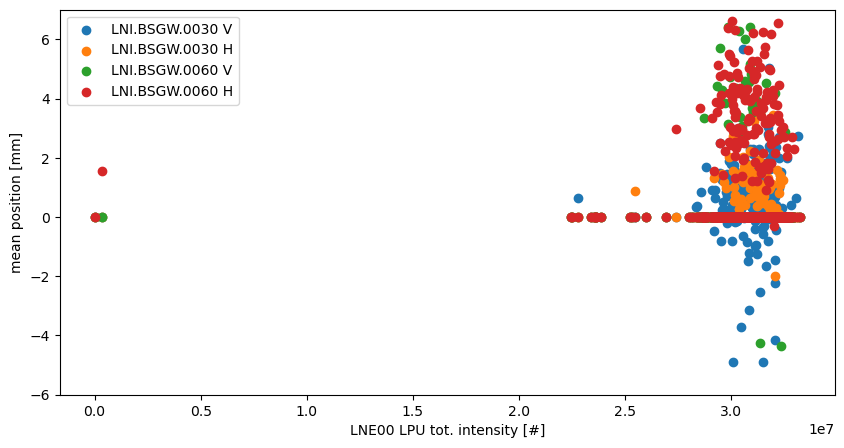

In [20]:
# Injected beam position as a funciton of extracted intensity

xvalue  = 4*1e6*extractedData['LNE.APULB.0030:INTENSITY'][1][filter_ELENA]
corrValue1 = SEM_position['LNI.BSGW.0030:FitAcq:gaussMean'][1][filter_ELENA,0]
corrValue2 = SEM_position['LNI.BSGW.0030:FitAcq:gaussMean'][1][filter_ELENA,1]
corrValue3 = SEM_position['LNI.BSGW.0060:FitAcq:gaussMean'][1][filter_ELENA,0]
corrValue4 = SEM_position['LNI.BSGW.0060:FitAcq:gaussMean'][1][filter_ELENA,1]

plt.figure()
plt.scatter(xvalue, corrValue1, label='LNI.BSGW.0030 V')
plt.scatter(xvalue, corrValue2, label='LNI.BSGW.0030 H')
plt.scatter(xvalue, corrValue3, label='LNI.BSGW.0060 V')
plt.scatter(xvalue, corrValue4, label='LNI.BSGW.0060 H')

plt.ylabel('mean position [mm]')
plt.xlabel('LNE00 LPU tot. intensity [#]')
plt.ylim([-6,7])
#plt.axis('equal')
plt.legend()

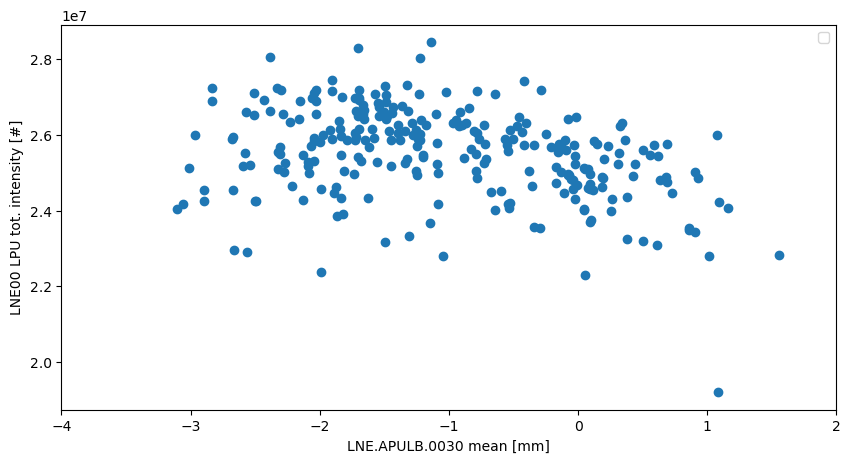

In [42]:
# Maybe there is a small correlation between BSGW0060 H and intensity...
# but is very little....

xvalue = SEM_position['LNI.BSGW.0060:FitAcq:gaussMean'][1][filter_ELENA,1]
yvalue = 4*1e6*extractedData['LNE.APULB.0030:INTENSITY'][1][filter_ELENA]

plt.figure()
plt.scatter(xvalue, yvalue)
plt.xlabel('LNE.APULB.0030 mean [mm]')
plt.ylabel('LNE00 LPU tot. intensity [#]')
plt.xlim([-4,2])
#plt.axis('equal')
plt.legend()

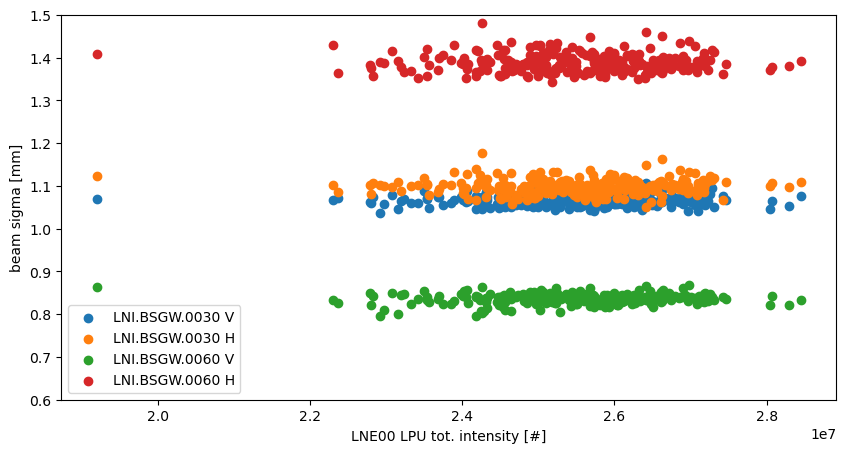

In [40]:
# Injected beam sigma as a funciton of extracted intensity

xvalue  = 4*1e6*extractedData['LNE.APULB.0030:INTENSITY'][1][filter_ELENA]
corrValue1 = SEM_sigmas['LNI.BSGW.0030:FitAcq:gaussSigma'][1][filter_ELENA,0]
corrValue2 = SEM_sigmas['LNI.BSGW.0030:FitAcq:gaussSigma'][1][filter_ELENA,1]
corrValue3 = SEM_sigmas['LNI.BSGW.0060:FitAcq:gaussSigma'][1][filter_ELENA,0]
corrValue4 = SEM_sigmas['LNI.BSGW.0060:FitAcq:gaussSigma'][1][filter_ELENA,1]

plt.figure()
plt.scatter(xvalue, corrValue1, label='LNI.BSGW.0030 V')
plt.scatter(xvalue, corrValue2, label='LNI.BSGW.0030 H')
plt.scatter(xvalue, corrValue3, label='LNI.BSGW.0060 V')
plt.scatter(xvalue, corrValue4, label='LNI.BSGW.0060 H')

plt.ylabel('beam sigma [mm]')
plt.xlabel('LNE00 LPU tot. intensity [#]')
plt.ylim([0.6,1.5])
#plt.axis('equal')
plt.legend()

### More direct correlations

In [47]:
t1 = '2021-10-05 01:00:00.000'
t2 = '2021-10-05 06:00:00.000'

customData = ldb.get(['LNR.APULB.0027:INTENSITY', 'LNE.APULB.0030:INTENSITY','LNA.BEAMPH-H1-SD:Samples:samples'], t1, t2)

In [60]:
## Look at beam phase
# A bit difficult, casuse xsample putting a lot of empty data...
simplifiedphases = np.array([item[0,:] for item in customData['LNA.BEAMPH-H1-SD:Samples:samples'][1] if len(item) > 0 ])


(460.0, 470.0)

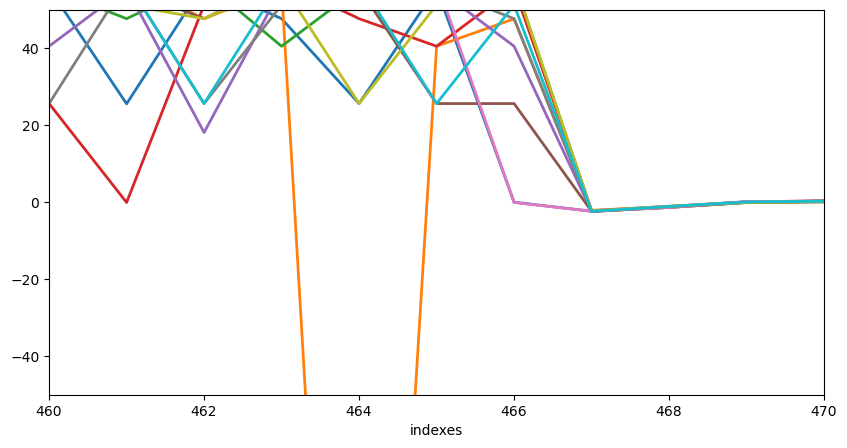

In [70]:

plt.figure()
for shotToPlot in np.arange(5,55,5):
    plt.plot(simplifiedphases[shotToPlot,:])
plt.plot(indexInjection,      simplifiedphases[shotToPlot,indexInjection],'x')
plt.xlabel("indexes")
#plt.ylabel("intensity [#]")
plt.ylim([-50, 50])
plt.xlim([460, 470])




#### check sync looking at cycle stamps:
plt.figure()
plt.plot(SEM_position['LNI.BSGW.0030:FitAcq:gaussMean'][0]-TPUDATA['LNA.TPU_INTSY-ACQ:Data:samples'][0])
plt.xlabel('Shot number #')
plt.ylabel('CycleStamp BSGW - ELENA_LLRF-TPU')


In [ ]:
print(ldb.search('HX:BETA%'))


In [ ]:
# DON'T MANAGE TO MAKE IT WORK...
bla = ldb.get(['DR.BCCCA_CHARGE-SD:Samples:hotSpotsTimes', 'DR.BCCCA_CHARGE-SD:Samples:hotSpotsSamples'], t1, t2)

In [10]:
BCCCADATA = ldb.get(['ADE.BCCCA:Acquisition:numOfChargesPerFlatTop'], t1, t2)



In [13]:
np.ndarray(BCCCADATA['ADE.BCCCA:Acquisition:numOfChargesPerFlatTop'][1])




ValueError: maximum supported dimension for an ndarray is 32, found 300

In [17]:
aaa=np.array(BCCCADATA['ADE.BCCCA:Acquisition:numOfChargesPerFlatTop'][1])

In [36]:
ADinjected = aaa[filter,0,0]
ADejected = aaa[filter,3,1]

Text(0, 0.5, 'xxxx')

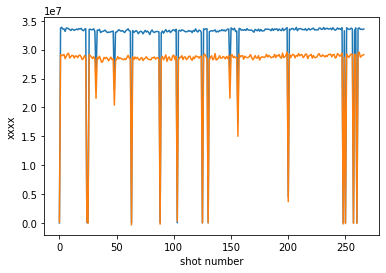

In [38]:
plt.figure()
plt.plot(ADinjected)
plt.plot(ADejected)
plt.xlabel("shot number")
plt.ylabel("xxxx")